In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [ ]:
df = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\GSS2018.csv')


In [ ]:
# Columns of interest based on the codebook and project requirements
columns_of_interest = ['RELIG', 'CHILDS', 'AGEKDBRN', 'EDUC', 'HAPPY', 'ATTEND', 'GOD', 'INCOME', 'FAMGEN', 'AGE', 'SEX', 'RACE', 'MARITAL', 'POLVIEWS']
# Create a new DataFrame with only the columns of interest
df_selected = df[columns_of_interest]


In [ ]:
# Read JSON file containing column descriptions
with open('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\GSS_Codebook_index.json', 'r') as f:
    column_descriptions = json.load(f)

# Only keep descriptions for columns we are interested in
column_descriptions = {k: column_descriptions[k] for k in columns_of_interest if k in column_descriptions}



In [ ]:
# Convert 'INCOME' to numeric
df_selected.loc[:, 'INCOME'] = pd.to_numeric(df_selected['INCOME'], errors='coerce')

# Cap 'AGE' at 100
df_selected.loc[:, 'AGE'] = df_selected['AGE'].apply(lambda x: min(x, 100))

# Drop rows with more than 3 missing values
df_cleaned = df_selected.dropna(thresh=len(df_selected.columns) - 3)


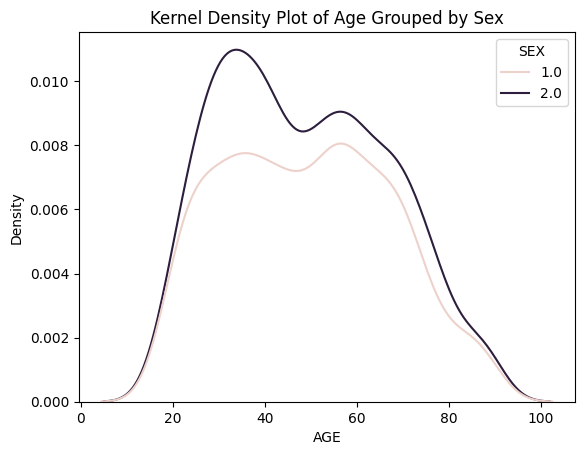

Summary Statistics: 
              RELIG       CHILDS     AGEKDBRN         EDUC        HAPPY  \
count  2323.000000  2338.000000  1664.000000  2337.000000  2337.000000   
mean      2.279811     1.859281    24.287861    13.730424     1.844673   
std       1.833054     1.674484     5.726536     2.974648     0.646585   
min       1.000000     0.000000    12.000000     0.000000     1.000000   
25%       1.000000     0.000000    20.000000    12.000000     1.000000   
50%       2.000000     2.000000    23.000000    14.000000     2.000000   
75%       4.000000     3.000000    28.000000    16.000000     2.000000   
max      13.000000     8.000000    51.000000    20.000000     3.000000   

            ATTEND          GOD       INCOME      FAMGEN          AGE  \
count  2328.000000  2313.000000  1983.000000  2339.00000  2334.000000   
mean      3.112113     4.865110    10.949571     1.52159    48.969580   
std       2.810422     1.554922     2.384883     0.92897    18.083376   
min       0.000000 

In [ ]:
# Kernel Density Plot of 'AGE' by 'SEX'
sns.kdeplot(data=df_cleaned, x='AGE', hue='SEX')
plt.title('Kernel Density Plot of Age Grouped by Sex')
plt.show()

# Summary Statistics
summary_stats = df_cleaned.describe()
print("Summary Statistics: \n", summary_stats)


**Analysis** of Kernel density plot of age grouped by sex:

1: MALE
2: FEMALE

The range of ages for all people in the data set is from around 18 to around 90. Females are more probable to be around 30, whereas males are more probable to be around 50. In general, females have a higher probability of being the age predicted since the curve is above the males curve.

In [ ]:
df_cleaned = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv')

# Count of non-null values in each column
non_null_count = df_cleaned.count()
print("Count of non-null values for each column: \n", non_null_count)


Count of non-null values for each column: 
 RELIG       2326
CHILDS      2325
AGEKDBRN    1663
EDUC        2324
HAPPY       2324
ATTEND      2316
GOD         2305
INCOME      1982
FAMGEN      2326
AGE         2321
SEX         2326
RACE        2326
MARITAL     2325
POLVIEWS    2240
HRS1        1377
dtype: int64


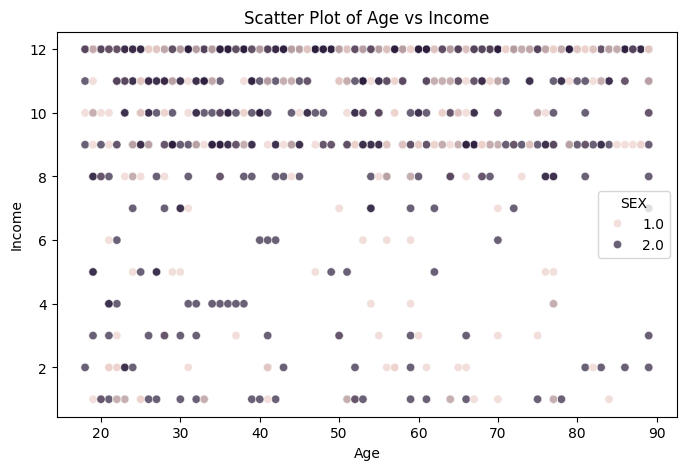

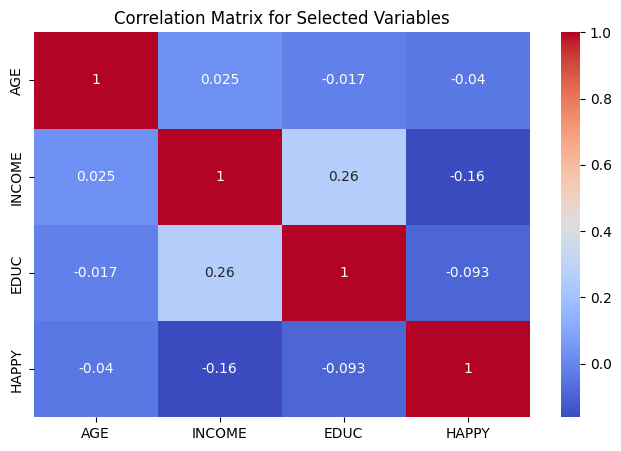

In [ ]:
# Impute missing values for 'INCOME' with median
median_income = df_cleaned['INCOME'].median()
df_cleaned.loc[:, 'INCOME'].fillna(median_income, inplace=True)

# Scatter plot of 'AGE' vs 'INCOME', differentiated by 'SEX'
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cleaned, x='AGE', y='INCOME', hue='SEX', alpha=0.7)
plt.title('Scatter Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

# Selecting a subset of variables for the correlation matrix
selected_vars = ['AGE', 'INCOME', 'EDUC', 'HAPPY']
correlation_matrix_subset = df_cleaned[selected_vars].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix_subset, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Variables')
plt.show()

**Analysis** of Scatterplot of age vs income grouped by sex:

There doesn't seem to be a clear linear trend. Maybe when people make higher incomes they achieve that for all of their ages?? Also no clear relation in terms of being grouped by sex.

**Analysis** of Correlation Matrix for 'AGE', 'INCOME', 'EDUC', 'HAPPY':

Education and age are positively correlated. Income and happiness are negatively correlated. This is interesting - so money doesn't buy happiness?


Correlation Matrix for Selected Variables
The heatmap below shows the correlation matrix for selected variables: 'AGE', 'INCOME', 'EDUC', and 'HAPPY'.

AGE: The age of the respondent.
INCOME: The income category to which the respondent belongs.
EDUC: The highest educational degree obtained by the respondent.
HAPPY: The general happiness level of the respondent.
Interpretation:

Positive numbers indicate a positive correlation: as one variable increases, the other variable tends to also increase.
Negative numbers indicate a negative correlation: as one variable increases, the other variable tends to decrease.
Values close to 1 or -1 indicate a strong correlation, while values close to 0 indicate weak or no correlation.


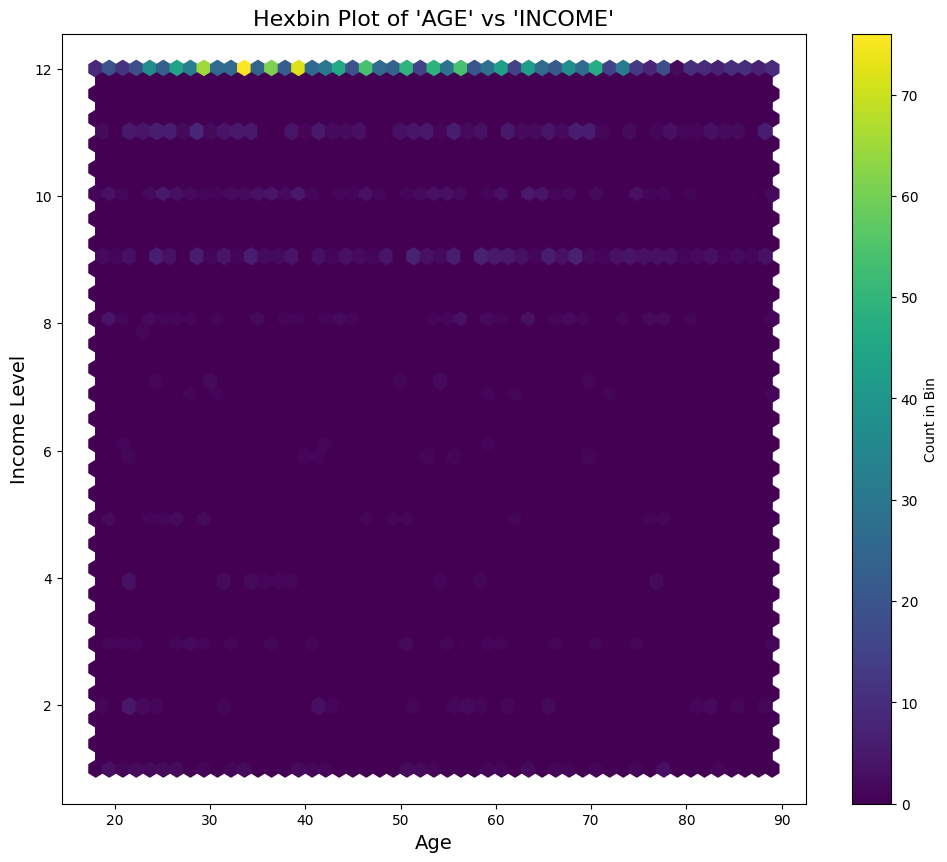

In [ ]:
df_cleaned = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv')

# Create the hexbin plot
plt.figure(figsize=(12, 10))
plt.hexbin(x=df_cleaned['AGE'], y=df_cleaned['INCOME'], gridsize=50, cmap='viridis')
plt.colorbar(label='Count in Bin')

# Add titles and labels
plt.title("Hexbin Plot of 'AGE' vs 'INCOME'", fontsize=16)
plt.xlabel("Age", fontsize=14)
plt.ylabel("Income Level", fontsize=14)

# Show the plot
plt.show()


**Analysis** of hexbin plot of age and income:

There are no observations of all ages for income levels below 5000/year? There are the most observations with an income of 25000+ in the 30-60 age range. It might be better to use INCOME16 instead of INCOME because it has a wider range of values.

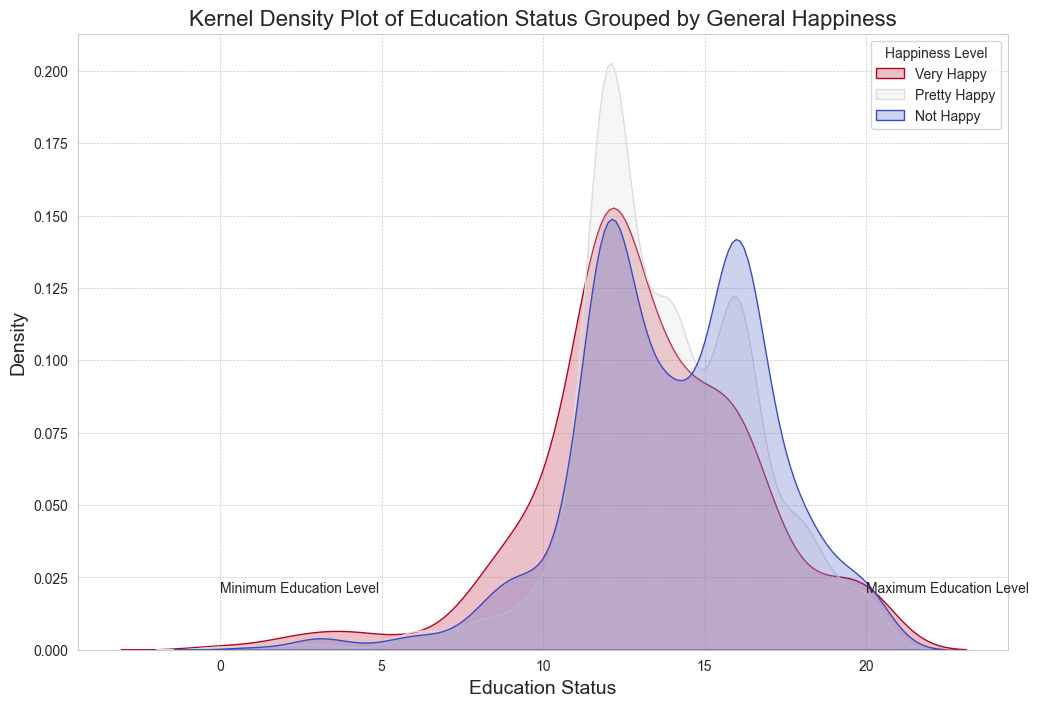

In [ ]:
df_cleaned = pd.read_csv('C:\\Users\\qaism\\OneDrive - University of Virginia\\Documents\\GitHub\\group14\\df_cleaned.csv')

# Configure plot aesthetics
sns.set_style("whitegrid")

# Create the figure
plt.figure(figsize=(12, 8))

# Create the grouped Kernel Density Plot with fill and custom palette
sns.kdeplot(data=df_cleaned, x='EDUC', hue='HAPPY', common_norm=False, fill=True, palette="coolwarm")

# Adding Annotations for minimum and maximum education levels
min_val = df_cleaned['EDUC'].min()
max_val = df_cleaned['EDUC'].max()
plt.text(min_val, 0.02, 'Minimum Education Level', rotation=0)
plt.text(max_val, 0.02, 'Maximum Education Level', rotation=0)

# Adding gridlines
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding Labels and Titles
plt.title('Kernel Density Plot of Education Status Grouped by General Happiness', fontsize=16)
plt.xlabel('Education Status', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Customize the legend
plt.legend(title='Happiness Level', labels=['Very Happy', 'Pretty Happy', 'Not Happy'])

# Show the plot
plt.show()
